```
conda install -c conda-forge scikit-learn pandas
```

# Trabajo 1 Redes Neuronales 
#### Leonardo Rodríguez, Hernán Gallardo, Juan Pablo Pezo
#### Domingo 30 de junio, 2024 Valdivia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

### Primera actividad de redes neuronales

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_data = cancer.data
y_data = cancer.target

(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
- En el siguiente bloque explore la data, con el fin de responder a estas preguntas.
    - ¿De que se trata el dataset?
    - ¿Cuales son las clases de salida?
    - ¿A que corresponden las caracteristicas?
    - ¿Cuantas caracteristicas y clases de salida hay?
    - Etc.

In [3]:
# Ver las primera filas del dataset para ver de que se trata
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
print(f"tamaño del dataset: {df.shape}")
descripcion = cancer.DESCR
df['target'] = cancer.target

df.head()

tamaño del dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Entendiendo el dataset
Al ver los datos que tenemos a simple vista como; el nombre del dataset, los nombres de las columnas y al ver el enlace adjunto podemos concluir que este conjunto de datos se usa para entrenar un modelo que pueda predecir la existencia o no de cancer de mama en algun paciente con x sintomas. En este caso es facil decir cuales son las clases de salida puesto que por sentido común podmeos decir que si alguien tiene cancer o no tiene, no existen punto medios.
Las caracteristicas son datos sacados de mediciones hechas a pacientes con sospechas de cancer de mama, en esos examenes se miden caracteriticas como:
-Radio (mean radius)
-Textura (mean texture)
-Perímetro (mean perimeter)
-Área (mean area)
-Suavidad (mean smoothness)
-Compacidad (mean compactness)
-Etc...
De estas caracteristicas hay 30.

In [4]:
# ver descripcion presente en el dataset
print(descripcion)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

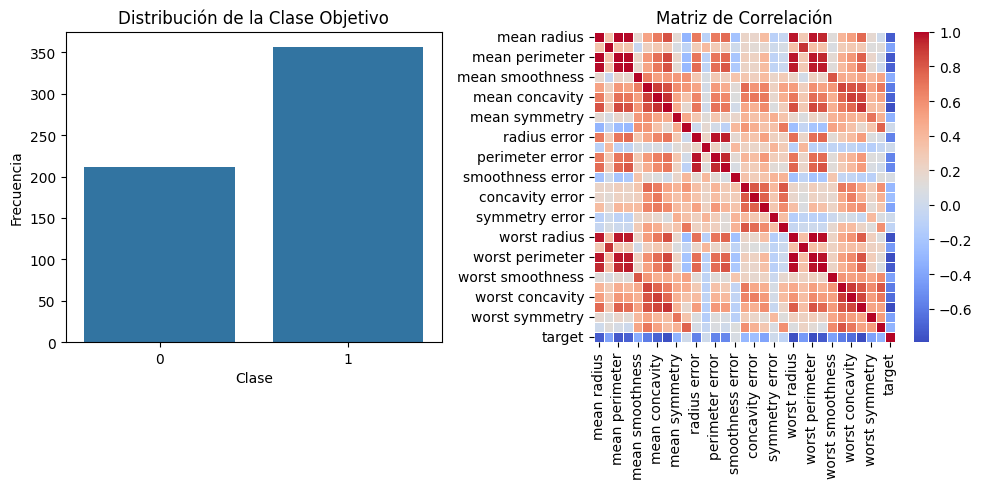

(       mean radius  mean texture  mean perimeter    mean area  \
 count   569.000000    569.000000      569.000000   569.000000   
 mean     14.127292     19.289649       91.969033   654.889104   
 std       3.524049      4.301036       24.298981   351.914129   
 min       6.981000      9.710000       43.790000   143.500000   
 25%      11.700000     16.170000       75.170000   420.300000   
 50%      13.370000     18.840000       86.240000   551.100000   
 75%      15.780000     21.800000      104.100000   782.700000   
 max      28.110000     39.280000      188.500000  2501.000000   
 
        mean smoothness  mean compactness  mean concavity  mean concave points  \
 count       569.000000        569.000000      569.000000           569.000000   
 mean          0.096360          0.104341        0.088799             0.048919   
 std           0.014064          0.052813        0.079720             0.038803   
 min           0.052630          0.019380        0.000000             0.0000

In [5]:
# Estadísticas descriptivas
stats_descriptives = df.describe()
# Distribución de la clase objetivo
target_distribution = df['target'].value_counts()

# Matriz de correlación
correlation_matrix = df.corr()

# Visualizaciones
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='target', data=df)
plt.title('Distribución de la Clase Objetivo')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

stats_descriptives, target_distribution

***La mayoría de entradas son benignas (357 vs 212 )***
La matriz de correlación muestra que algunas características tienen correlaciones fuertes, lo que puede ser útil para la selección de características o la reducción de dimensionalidad en análisis posteriores.

In [6]:
import torch
from torch.utils.data import random_split,DataLoader,TensorDataset

X = torch.tensor(X_data, dtype=torch.float32)
Y = torch.tensor(y_data,dtype=torch.long)

dataset = TensorDataset(X,Y)

train_set, valid_set,test_set = random_split(dataset,[342,113,114],generator=torch.Generator().manual_seed(1234)) ##No cambiar la semilla
train_loader = DataLoader(train_set, shuffle=True, batch_size=32)
valid_loader = DataLoader(valid_set, shuffle=False, batch_size=128)
test_loader = DataLoader(test_set, shuffle=False, batch_size=128)

## Implentación de la Red Neuronal
- En el siguiente bloque implemente el modelo que utilizará su red neuronal para predecir si un paciente tiene cáncer o no, teniendo en cuenta sus caracteristicas.

In [9]:
import torch.nn as nn
class MiClase(nn.Module):
    def __init__(self):
        super(MiClase, self).__init__()
        self.hidden = nn.Linear(30, 16)  # Capa de entrada de 30 características a 16 neuronas ocultas
        self.hidden2 = nn.Linear(16,8) # De 16 neuronas ocultas a 8
        self.output = nn.Linear(8, 1) # Capa de salida a 1 neurona
        self.activation = nn.ReLU()
    def forward(self, x):
        x = self.hidden(x)
        x = self.activation(x)
        x = self.hidden2(x)
        x= self.activation(x)
        x = self.output(x)
        return x


- En el siguiente bloque cree una instancia de su red neuronal definida anteriormente y defina una función de pérdida y optimizador adecuados:

In [10]:
model = MiClase()
criterion = nn.BCEWithLogitsLoss()  # Para problemas de clasificación binaria
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

## Responda: 
### ¿Porqué eligió esa función de pérdida?

Se elegió **BCEWithLogitsLoss** poque esta combina 2 funciones, la función Sigmoide que convierte las salidas lineales en probabilidades dentro del rango (0 a 1) lo cual es ideal para problemas de clasificación binaria. Además utiliza La entropia binaria cruzada que calcula la perdida binaria cruzada entre las probabilidades que el modelo predijo y las etiquetas realeas de los datos.

### Elija 2 optimizadores populares y describalos, luego explique porqué elige uno de los 2.

A- El optimizar **Adam** presente el PyTorch es popular debido a su eficiencia computacional y que se pueda usar en varios tipos de problemas por su adaptabilidad. Este tiene las ventajas de 2 métodos de optimización conocidos como; AdaGrad y RMSProp.

B- **SGD (Stochastic Gradient Descent)**: Método clásico del gradiante descendiente, puede usarse con momentum para acelerar el entrenamiento y puede incluso ayudarnos a reducir el numero de oscilaciones en el entrenamiento.

Nos quedamos con **Adam** por defecto puesto que nos parece más sencillo de usar y entender, además de que la eficiencia computacional es un buen atractivo para trabajar de manera más rapida.
        

- En el siguiente bloque programe el entrenamiento de su red neuronal

In [27]:
from tqdm import tqdm

num_epochs = 1000 # Modificar este valor para hacer pruebas
model = MiClase()
criterion = nn.BCEWithLogitsLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

# Guardar datos de perdidas

train_losses = [] 
valid_losses = []

running_loss = np.zeros((num_epochs,2))
for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = 0.0
    for minibatch in train_loader:
        optimizer.zero_grad()
        x_batch, y_batch = minibatch
        outputs = model(x_batch)
        loss = criterion(outputs.squeeze(), y_batch.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    model.eval()
    valid_loss = 0.0
    with torch.no_grad():
        for minibatch in valid_loader:
            x_batch, y_batch = minibatch
            outputs = model(x_batch)
            loss = criterion(outputs.squeeze(), y_batch.float())
            valid_loss += loss.item()
    valid_losses.append(valid_loss / len(valid_loader))
    
    running_loss[epoch] = [train_loss / len(train_loader), valid_loss / len(valid_loader)]
    
    if epoch % 100 == 0: # Modificar para no tener tantos print´s en caso de aumentar epocas!
        print(f'Epoch {epoch} Train Loss: {train_loss / len(train_loader):.4f}, Valid Loss: {valid_loss / len(valid_loader):.4f}')

  0%|          | 3/1000 [00:00<00:50, 19.64it/s]

Epoch 0 Train Loss: 0.9368, Valid Loss: 0.6185


 11%|█         | 106/1000 [00:04<00:33, 26.73it/s]

Epoch 100 Train Loss: 0.1832, Valid Loss: 0.1811


 21%|██        | 206/1000 [00:08<00:30, 26.20it/s]

Epoch 200 Train Loss: 0.2230, Valid Loss: 0.5736


 31%|███       | 306/1000 [00:11<00:26, 25.82it/s]

Epoch 300 Train Loss: 0.1133, Valid Loss: 0.1656


 40%|████      | 405/1000 [00:15<00:21, 27.08it/s]

Epoch 400 Train Loss: 0.1520, Valid Loss: 0.3880


 50%|█████     | 503/1000 [00:19<00:38, 12.85it/s]

Epoch 500 Train Loss: 0.1070, Valid Loss: 0.1005


 60%|██████    | 605/1000 [00:23<00:14, 26.76it/s]

Epoch 600 Train Loss: 0.1275, Valid Loss: 0.1070


 70%|███████   | 704/1000 [00:27<00:11, 25.56it/s]

Epoch 700 Train Loss: 0.1230, Valid Loss: 0.0953


 80%|████████  | 805/1000 [00:31<00:07, 26.67it/s]

Epoch 800 Train Loss: 0.1198, Valid Loss: 0.0943


 90%|█████████ | 905/1000 [00:35<00:03, 27.86it/s]

Epoch 900 Train Loss: 0.1664, Valid Loss: 0.0957


100%|██████████| 1000/1000 [00:38<00:00, 25.78it/s]


### En el sigueinte bloque muestre el gráfico de entrenamiento y validación.

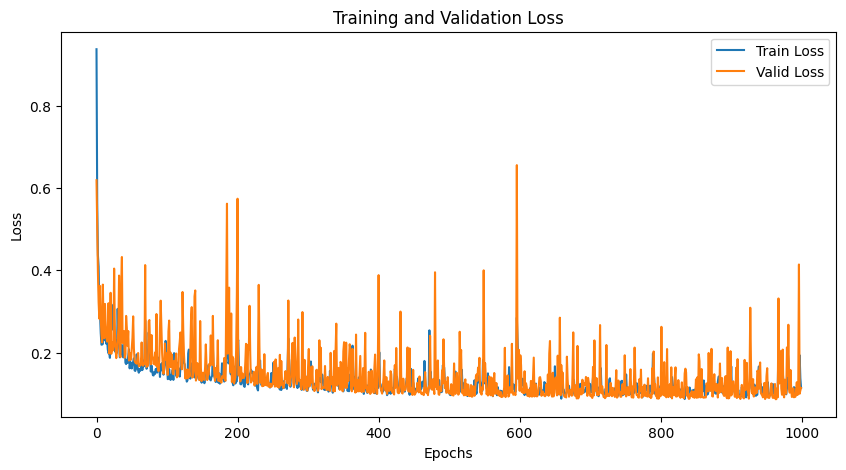

In [28]:
# Graficar las pérdidas de entrenamiento y validación
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

### ¿El entrenamiento de su red neuronal está "listo"?

la pérdida de entrenamiento se ha estabilizado y ya no disminuye con más épocas, es una señal de que el modelo ha alcanzado su capacidad de aprendizaje.
Más adelante se puede ver que las metricas que miden el modelo son bastante buenas, por lo que no se ve necesario seguir entrenando el modelo. Lo que nos lleva a concluir que el modelo **esta "listo"**


- En el siguiente bloque evalue que tan bueno es su modelo mediante diferentes métricas

Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9625
F1 Score: 0.9809
AUC: 0.9993


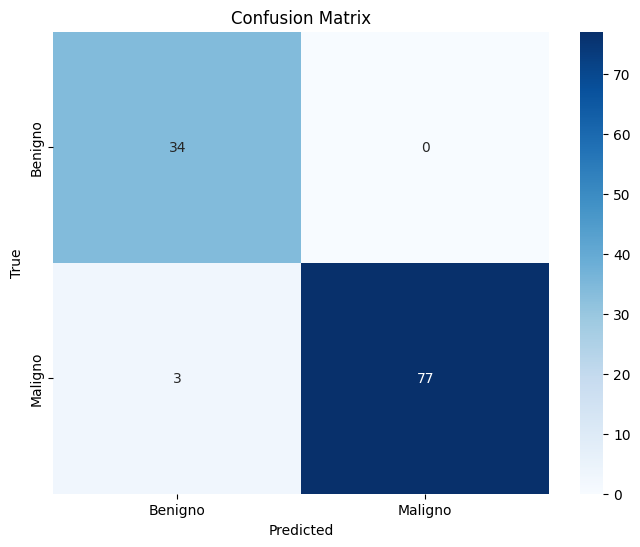

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model.eval()
y_true = []
y_pred = []
y_prob = []

with torch.no_grad():
    for minibatch in test_loader:
        x_batch, y_batch = minibatch
        outputs = model(x_batch).squeeze()
        probabilities = torch.sigmoid(outputs)
        predictions = (probabilities > 0.5).long()
        
        y_true.extend(y_batch.tolist())
        y_pred.extend(predictions.tolist())
        y_prob.extend(probabilities.tolist())

# Convertir listas a numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_prob = np.array(y_prob)

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
cm_display_labels = ['Benigno', 'Maligno']

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_display_labels, yticklabels=cm_display_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### _Registro de metricas_ ###
* 100 epocas 
    * Accuracy: 0.9386 
    * Precision: 0.9867
    * Recall: 0.9250
    * F1 Score: 0.9548
    * AUC: 0.9952
* 1000 epocas
    * Accuracy: 0.9737
    * Precision: 1.0000
    * Recall: 0.9625
    * F1 Score: 0.9809
    * AUC: 0.9993
    

## Concluya sobre su trabajo.  
### Responda
#### ¿Qué tan confiable sería su modelo en un entorno clínico? 
El modelo seria bastante confiable, puesto que tiene una exactitud del 97.37% de hacer la predicción correcta, como se muestra en la matriz de confusió los resultados son muy aceptables, La precisión es practicamente perfecta indicando que no hay falsos positivos en las predicciones. Nuestro recall es alto lo cual es importante para los casos donde es importante identicar la mayoria de las instancias positivas. El mismo analisis se puede hacer con los parametros restantes, por lo que podemos decir que se puede confiar en el modelo, pero aún asi se recomienda usar tecnicas más manuales para asegurar los resultados.
#### ¿Qué haría para mejorarlo?
Podriamos realizar verificaciones sobre los datos de entrenamiento, por ejemplo podemos hacer validación cruzada o verificar si los datos estan balaceados o desbalanceados
#### Sobre la matriz de confusión, ¿Alguno de sus elementos son más importantes que otros en este caso?
Si, el elemento que consideramos más importante es el maligno, puesto que hay 3 casos que eran malignos, pero el modelo predijo que eran benignos, lo cual nos llevó a hacer la recomendación en la respuesta anterior.
asdasd
#### ¿Que significaría el aumento de FN o FP en este caso? 
Si aumentan los FN (False negative) se perderia la confianza en el modelo, puesto que podría llevar a ignorar casos criticos de pacientes. Si FP aumenta puede llevar a afectar a los pacientes o al hospital con Ansiedad, estres o costos economicos innecesarios.
#### Investigue sobre alguna arquitectura de red neuronal distinta a la utilizada en este trabajo, describala y explique en que casos sería útil.
Deep Convolutional Networks (DCN) son una arquitectura de redes neuronales que se bastante utilizada para el trabajo de reconocimiento de imagenes, su estructura inspirada en el procesamiento visual biológico. Aunque son extremadamente efectivas, requieren grandes cantidades de datos y recursos computacionales. Posee una arquitectura de capas convolucionales intercaladas con capas de pooling.




In [ ]:
<img src="dcn.png"  width="1000" height="600">

### Pregunta Bonus
#### ¿Cúal es la principal limitación de las redes neuronales comparado al cerebro humano?

##### **_Respuesta Pendiente_**